# Congratulations!
If you're reading this, it probably means that you have successfully installed anaconda, created the irisnstuff virtual python environment, and opened this Jupyter Notebook up in your browser. (Or you are just editing the ipynb xml document containing this code in a text editor, in which case you are also very clever.)

The first lines of code below are "import" statements. If you're not familiar with Python, it is a general-purpose interpreted language, and to get more specific functionality (like for atmospheric science), people write packages (like metpy or xarray) to extend python's functionality. You probably installed these packages yourself a few minutes ago.

This next line after that sets up some map plotting preferences.

The block after that defines a function used to plot the same coastlines, state lines, and country borders in each of the two plots you will later make.
## Step 0 - Rename this file
Up at the top of this window, you should see that the name of this file is `water_vapor_variables_[lastname]_[firstname]`. Click it, and change `[lastname]` to your last name, and `[firstname]` to, say, your first name.
## Step 1 - Run some code...
Go ahead and click on the block of code below and click "Run" above, or press shift+enter on your keyboard to run the code.

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndimage
import xarray as xr
from metpy.plots import add_metpy_logo

# Center the map view over the continental United States
crs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=45.0)

# Function used to create the map subplots
def plot_background(ax):
    ax.set_extent([235., 290., 20., 55.])
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5, edgecolor='gray')
    ax.add_feature(cfeature.STATES, linewidth=0.5, edgecolor='gray')
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='gray')
    return ax

## Step 2 - Read some data
In order to read in the data to plot for this assignment, you will need to be sure to have the NAM (North American Mesoscale) model output in the same directory as the jupyter notebook file. Once you have the NAM data downloaded and in the folder with this notebook, go ahead and run the code block below

In [2]:
# open the grib dataset
ds = xr.open_dataset('nam.t00z.awip3d00.tm00.grib2', engine='cfgrib', filter_by_keys={'stepType': 'instant', 'typeOfLevel': 'surface'})

# read in the longitude and latitude data
lon_2d, lat_2d = ds['longitude'], ds['latitude']

# Read the specific humidity and temperature data
specific_humidity = ds['q']
air_temp = ds['t']

## Step 3 - Code up your calculations
Use the material in §3.4.2 and §3.4.3 to calculate in the cell below the mixing ratio and virtual temperature using the specific humidity and air temperature you read in the cell above. (You will need to uncomment the code; I used block comments, which in python consist of three apostrophies at the beginning and at the end of the commented-out code.)

_HINT:_ the virtual temperature calculation below will make use of both `air_temp` and `specific_humidity`. In order to give `virt_temp` the attriburtes of `air_temp` (including the units of Kelvins), you will want to replace `specific_humidity` in your `virt_temp` calculation below `specific_humidity.data`. This will use just the numbers from `specific_humidity`, ignore its other attributes, and use the attributes from `air_temp` instead. (If you do not do this, the unit conversions will fail.)

In [3]:
'''
# calculate the mixing ratio
mixing_ratio = 

# calculate the virtual temperature
R_dry_air = 
R_water_vapor = 
epsilon = 
virt_temp = # be sure to use specific_humidity.data rather than just specific_humidity in this calculation
'''

'\n# calculate the mixing ratio\nmixing_ratio = \n\n# calculate the virtual temperature\nR_dry_air = \nR_water_vapor = \nepsilon = \nvirt_temp = # be sure to use specific_humidity.data rather than just specific_humidity in this calculation\n'

## Step 4 - Inspect your data to be sure it looks good
One nice thing about Jupyter Notebooks is that your variables persist as long as you don't restart your "kernel" (the program that is interpreting your code). You can take advantage of this and inspect your variables easily. Run the cell below to inspect `mixing_ratio`, including its attributes and some of its values. Be sure it has the same units as `specific_humidity`. Do the same thing with `virt_temp`. Make sure it has reasonable values and similar units as `air_temp`.

In [4]:
'''mixing_ratio'''

'mixing_ratio'

In [5]:
'''virt_temp'''

'virt_temp'

## Step 5 - Improve the plots!
The code below should run just fine as-is, because I commented out (using '''block comments''') all the bits of code dealing with mixing ratio and virtual temperature.

To start with, go ahead and run the code as-is. If all goes well, it should create a pair of plots--one of specific humidity, and one of temperature.

Once you've double-checked the plotting code and gotten a couple of plots, go ahead and start uncommenting the code snippets that have to do with `mixing_ratio` and `virt_temp`. When you are done, you should end up with two plots, each with two sets of contour lines and a set of filled contours.

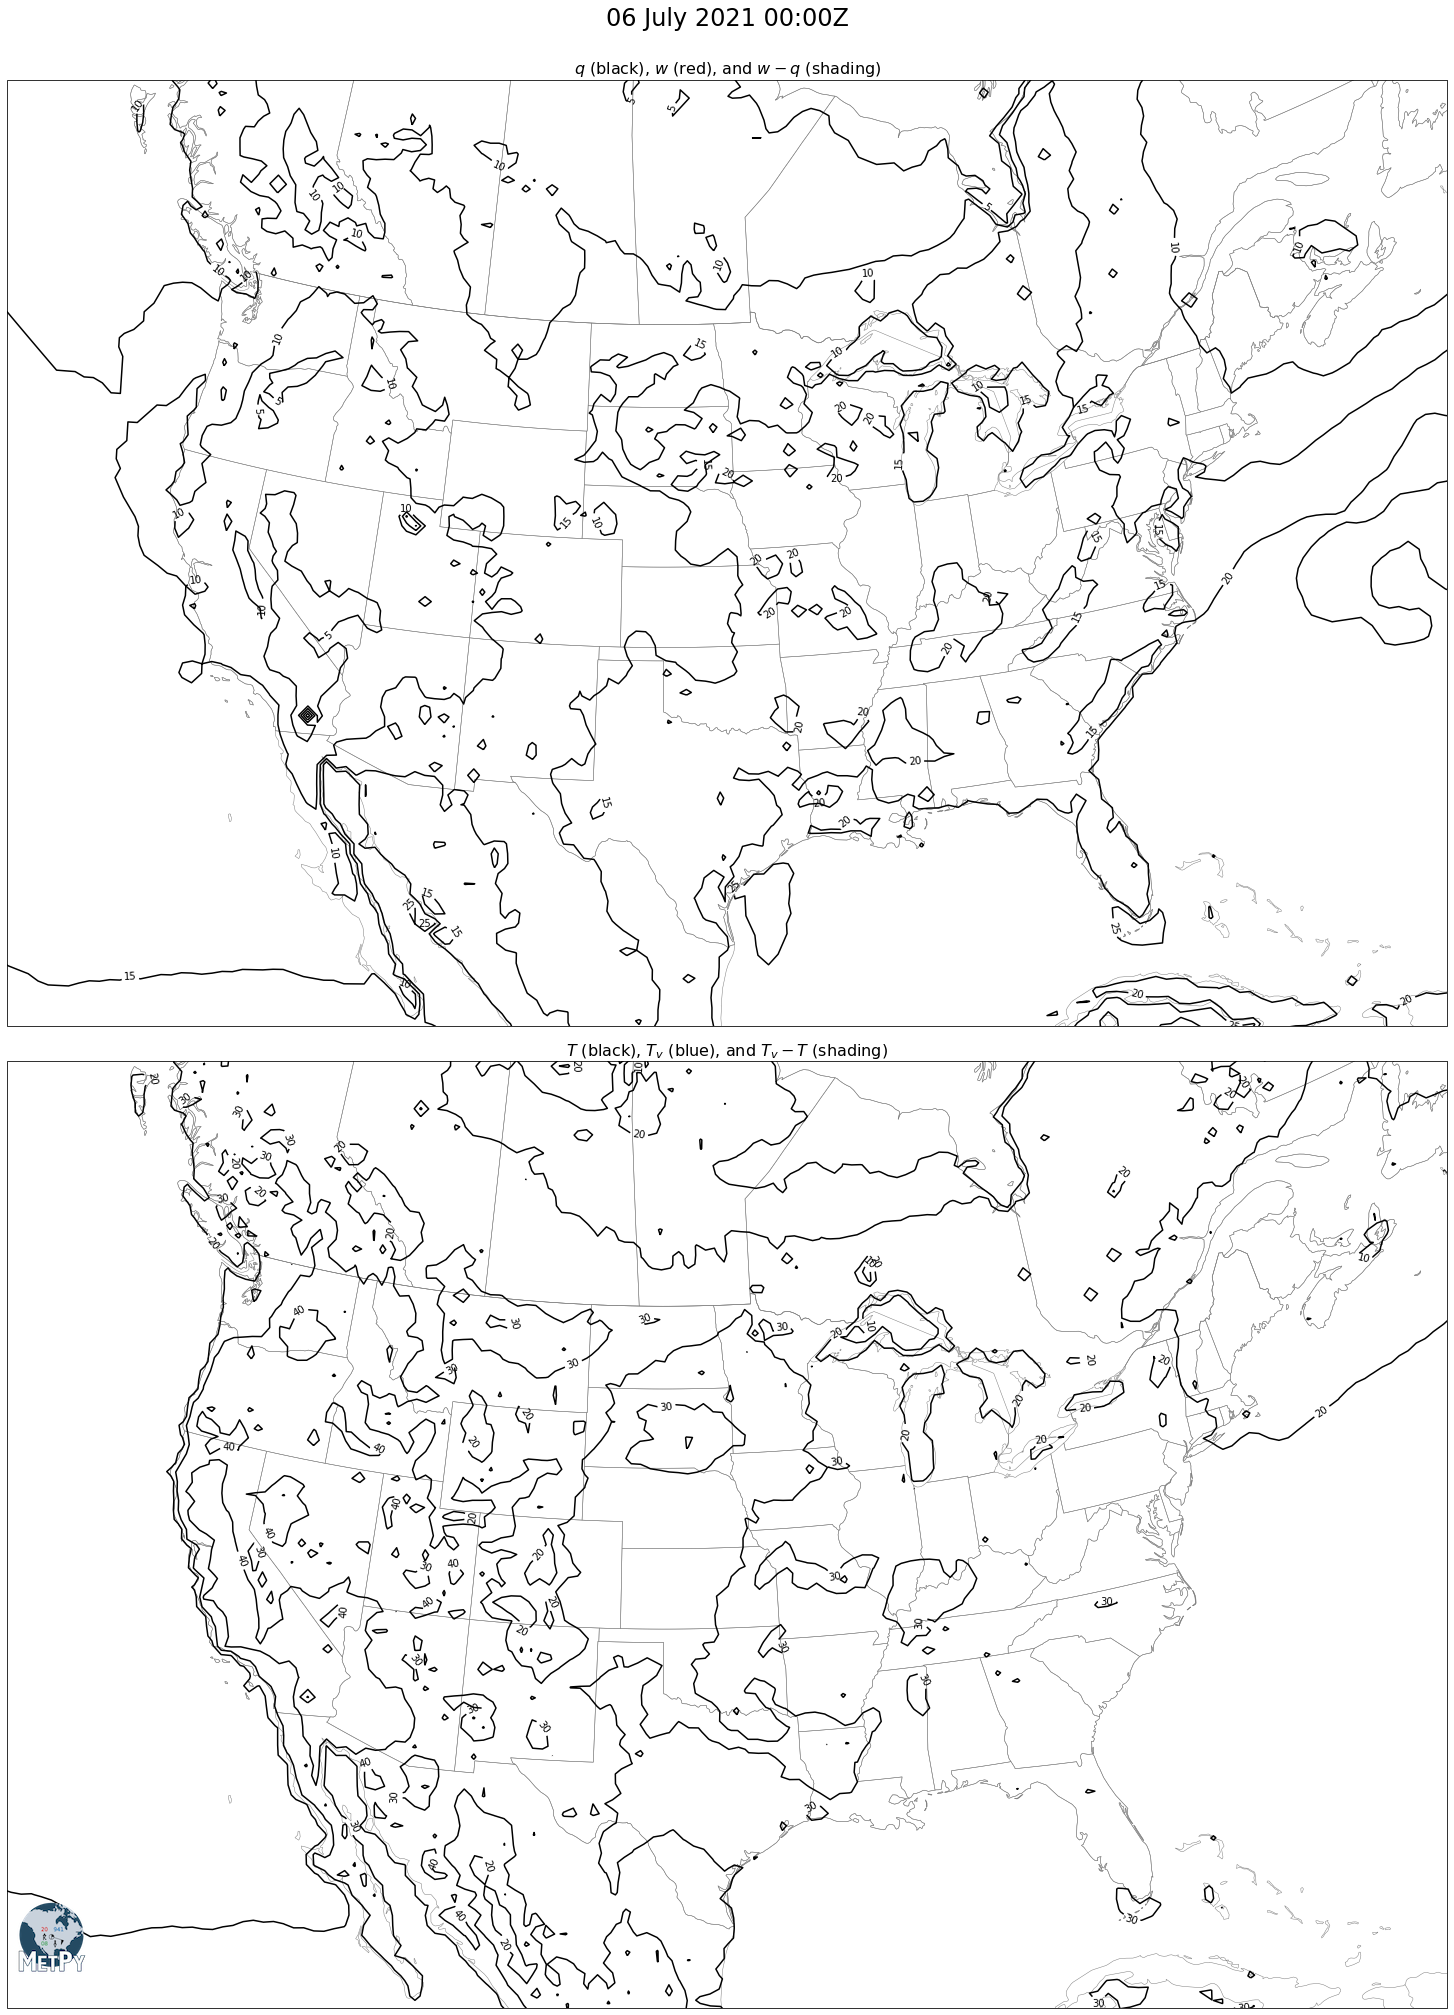

In [6]:
# convert units
specific_humidity = specific_humidity.metpy.convert_units('g kg**-1')
air_temp = air_temp.metpy.convert_units('degC')
'''
mixing_ratio = mixing_ratio.metpy.convert_units('g kg**-1')
virt_temp = virt_temp.metpy.convert_units('degC')
'''

# Create the figure and plot background on different axes
fig, axarr = plt.subplots(nrows=2, ncols=1, figsize=(20, 28), constrained_layout=True,
                          subplot_kw={'projection': crs})
add_metpy_logo(fig, 14, 40, size='small')
axlist = axarr.flatten()
for ax in axlist:
    plot_background(ax)

# Upper left plot - specific humidity
c1a = axlist[0].contour(lon_2d, lat_2d, specific_humidity, [5, 10, 15, 20, 25, 30], colors='black',
                       transform=ccrs.PlateCarree())
'''
c1b = axlist[0].contour(lon_2d, lat_2d, mixing_ratio, [5, 10, 15, 20, 25, 30], colors='red',
                       transform=ccrs.PlateCarree())
cf1 = axlist[0].contourf(lon_2d, lat_2d, mixing_ratio-specific_humidity, [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], cmap='GnBu',
                       transform=ccrs.PlateCarree(), zorder=0)
'''
axlist[0].clabel(c1a, fontsize=10, inline=1, inline_spacing=1, fmt='%i', rightside_up=True)
'''
axlist[0].clabel(c1b, fontsize=10, inline=1, inline_spacing=1, fmt='%i', rightside_up=True)
cb1 = fig.colorbar(cf1, ax=axlist[0], orientation='horizontal', shrink=0.74, pad=0)
cb1.set_label('g kg$^{-1}$', size='x-large')
'''

axlist[0].set_title('$q$ (black), $w$ (red), and $w-q$ (shading)', fontsize=16)

# Lower left plot - surface temperatures
c2a = axlist[1].contour(lon_2d, lat_2d, air_temp, [10, 20, 30, 40], colors='black',
                         transform=ccrs.PlateCarree())
'''
c2b = axlist[1].contour(lon_2d, lat_2d, virt_temp, [10, 20, 30, 40], colors='blue',
                         transform=ccrs.PlateCarree())
cf2 = axlist[1].contourf(lon_2d, lat_2d, virt_temp-air_temp, [1, 2, 3, 4, 5], cmap='OrRd',
                       transform=ccrs.PlateCarree(), zorder=0)
'''
axlist[1].clabel(c2a, fontsize=10, inline=1, inline_spacing=1, fmt='%i', rightside_up=True)
'''
axlist[1].clabel(c2b, fontsize=10, inline=1, inline_spacing=1, fmt='%i', rightside_up=True)
cb2 = fig.colorbar(cf2, ax=axlist[1], orientation='horizontal', shrink=0.74, pad=0)
cb2.set_label('$^\circ$C', size='x-large')
'''
axlist[1].set_title('$T$ (black), $T_v$ (blue), and $T_v-T$ (shading)', fontsize=16)

# Set height padding for plots
fig.set_constrained_layout_pads(w_pad=0., h_pad=0.1, hspace=0., wspace=0.)

# Set figure title
fig.suptitle(ds['time'].dt.strftime('%d %B %Y %H:%MZ').values, fontsize=24)

# Display the plot
plt.show()

## Step 6 - Turn this in!
Once your plots look good, save your jupyter notebook. You can go ahead and close the browser tab, and kill the Jupyter server that's been running this whole time (`ctrl+c` a couple of times in the terminal window should do it). Your Jupyter Notebook file will be your canvas submission!